In [16]:
from astropy.table import Table
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def open_fits(filename: str):
    """"
    Open fits file and load it as a pandas dataframe

    :param filename: location of the fits file

    :returns: data, pandas dataframe
    """
    dat = Table.read(filename, format='fits')
    data = dat.to_pandas()
    return data

In [3]:
# Creating file paths
folder_path = "../../Data/Fangyou_data/Original/Raw/"
files = os.listdir(folder_path)
file_paths = [folder_path + file for file in files]

In [4]:
data = []
for file in file_paths:
    dat = open_fits(file)
    data.append(dat)
    print(file, " has ", len(dat), " rows.")

../../Data/Fangyou_data/Original/Raw/Bootes_sedfit_v1.0.fits  has  19179  rows.
../../Data/Fangyou_data/Original/Raw/EN1_sedfit_v1.0.fits  has  31610  rows.
../../Data/Fangyou_data/Original/Raw/LH_sedfit_v1.0.fits  has  31162  rows.


In [87]:
# Finding unique columns across the 3 datasets
all_columns = [list(data[0].columns), list(data[1].columns), list(data[2].columns)]
all_columns = [item for sublist in all_columns for item in sublist]
unique_columns, indexes = np.unique(all_columns, return_index=True)
unique_columns = [all_columns[index] for index in sorted(indexes)]

# Column for filling in all the data about which columns are in which datasets
binary_columns = np.zeros((3,len(unique_columns)))

for i, dat in enumerate(data):
    current_columns = list(dat.columns)
    for j, has_column in enumerate(unique_columns):
        if has_column in current_columns:
            binary_columns[i,j]=1

In [100]:
# Dataframe containing which columns are in which dataset
has_column_dataframe = pd.DataFrame(binary_columns.T, index=unique_columns, columns=["Bootes", "Elais-N1", "Lockman Hole"])

In [105]:
has_column_dataframe['Sum'] = has_column_dataframe.sum(axis=1)

In [106]:
from IPython.display import display
with pd.option_context('display.max_rows', 500):
    display(has_column_dataframe)

,Bootes,Elais-N1,Lockman Hole,Sum
Source_Name,1.0,1.0,1.0,3.0
FLAG_DEEP,1.0,0.0,0.0,1.0
ID,1.0,1.0,1.0,3.0
FLAG_OVERLAP,1.0,1.0,1.0,3.0
Z_BEST,1.0,1.0,1.0,3.0
z1_median,1.0,1.0,1.0,3.0
XID+_rerun_mips,1.0,1.0,1.0,3.0
XID+_rerun_pacs,1.0,1.0,1.0,3.0
XID+_rerun_SPIRE,1.0,1.0,1.0,3.0
CHANGE_FLAG_ID,1.0,1.0,1.0,3.0


<AxesSubplot:>

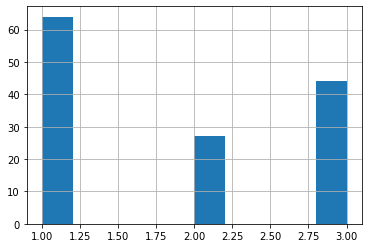

In [108]:
has_column_dataframe['Sum'].hist()

In [34]:
print("Bootes NaN's per column:\n")

print(data[0].isna().sum().to_string())

Bootes NaN's per column:

Source_Name             0
FLAG_DEEP             600
ID                    600
FLAG_OVERLAP          600
Z_BEST                916
z1_median             929
XID+_rerun_mips         0
XID+_rerun_pacs         0
XID+_rerun_SPIRE        0
CHANGE_FLAG_ID          0
CHANGE_FLAG_ZBEST       0
CHANGE_FLAG_DEEP        0
CHANGE_FLAG_FIR         0
FLAG_GOOD               0
radioID                 0
u_f                  2386
u_e                  2386
u_e_raw              2386
Bw_f                 1246
Bw_e                 1246
Bw_e_raw             1239
R_f                  1100
R_e                  1100
R_e_raw              1085
I_f                   976
I_e                   976
I_e_raw               957
z_f                  5149
z_e                  5149
z_e_raw              4917
z_Subaru_f           2643
z_Subaru_e           2643
z_Subaru_e_raw       2112
y_f                  2414
y_e                  2414
y_e_raw              2336
J_f                  1150
J_e         

In [35]:
print("EN1 NaN's per column:\n")

print(data[1].isna().sum().to_string())

EN1 NaN's per column:

Source_Name              0
ID                     771
FLAG_OVERLAP           771
Z_BEST                1072
z1_median             1083
XID+_rerun_mips          0
XID+_rerun_pacs          0
XID+_rerun_SPIRE         0
CHANGE_FLAG_ID           0
CHANGE_FLAG_ZBEST        0
CHANGE_FLAG_DEEP         0
CHANGE_FLAG_FIR          0
FLAG_GOOD                0
radioID                  0
u_f                    828
u_e                    828
u_e_raw                828
g_f                    840
g_e                    840
g_e_raw                818
r_f                    845
r_e                    845
r_e_raw                838
i_f                    789
i_e                    789
i_e_raw                789
z_f                    802
z_e                    802
z_e_raw                798
y_f                    821
y_e                    821
y_e_raw                816
g_hsc_f               2409
g_hsc_e               2409
g_hsc_e_raw           2407
r_hsc_f               2412
r_hsc

In [36]:
print("Lockman Hole NaN's per column:\n")

print(data[2].isna().sum().to_string())

Lockman Hole NaN's per column:

Source_Name              0
ID                     760
FLAG_OVERLAP           760
Z_BEST                 955
z1_median              959
XID+_rerun_mips          0
XID+_rerun_pacs          0
XID+_rerun_SPIRE         0
CHANGE_FLAG_ID           0
CHANGE_FLAG_ZBEST        0
CHANGE_FLAG_DEEP         0
CHANGE_FLAG_FIR          0
FLAG_GOOD                0
radioID                  0
u_f                   1082
u_e                   1082
u_e_raw               1082
g_f                    813
g_e                    813
g_e_raw                813
r_f                    874
r_e                    874
r_e_raw                796
z_f                   1743
z_e                   1743
z_e_raw               1700
g_rcs_f               3817
g_rcs_e               3817
g_rcs_e_raw           3317
r_rcs_f               3892
r_rcs_e               3892
r_rcs_e_raw           3322
i_rcs_f               3647
i_rcs_e               3647
i_rcs_e_raw           3338
z_rcs_f               3

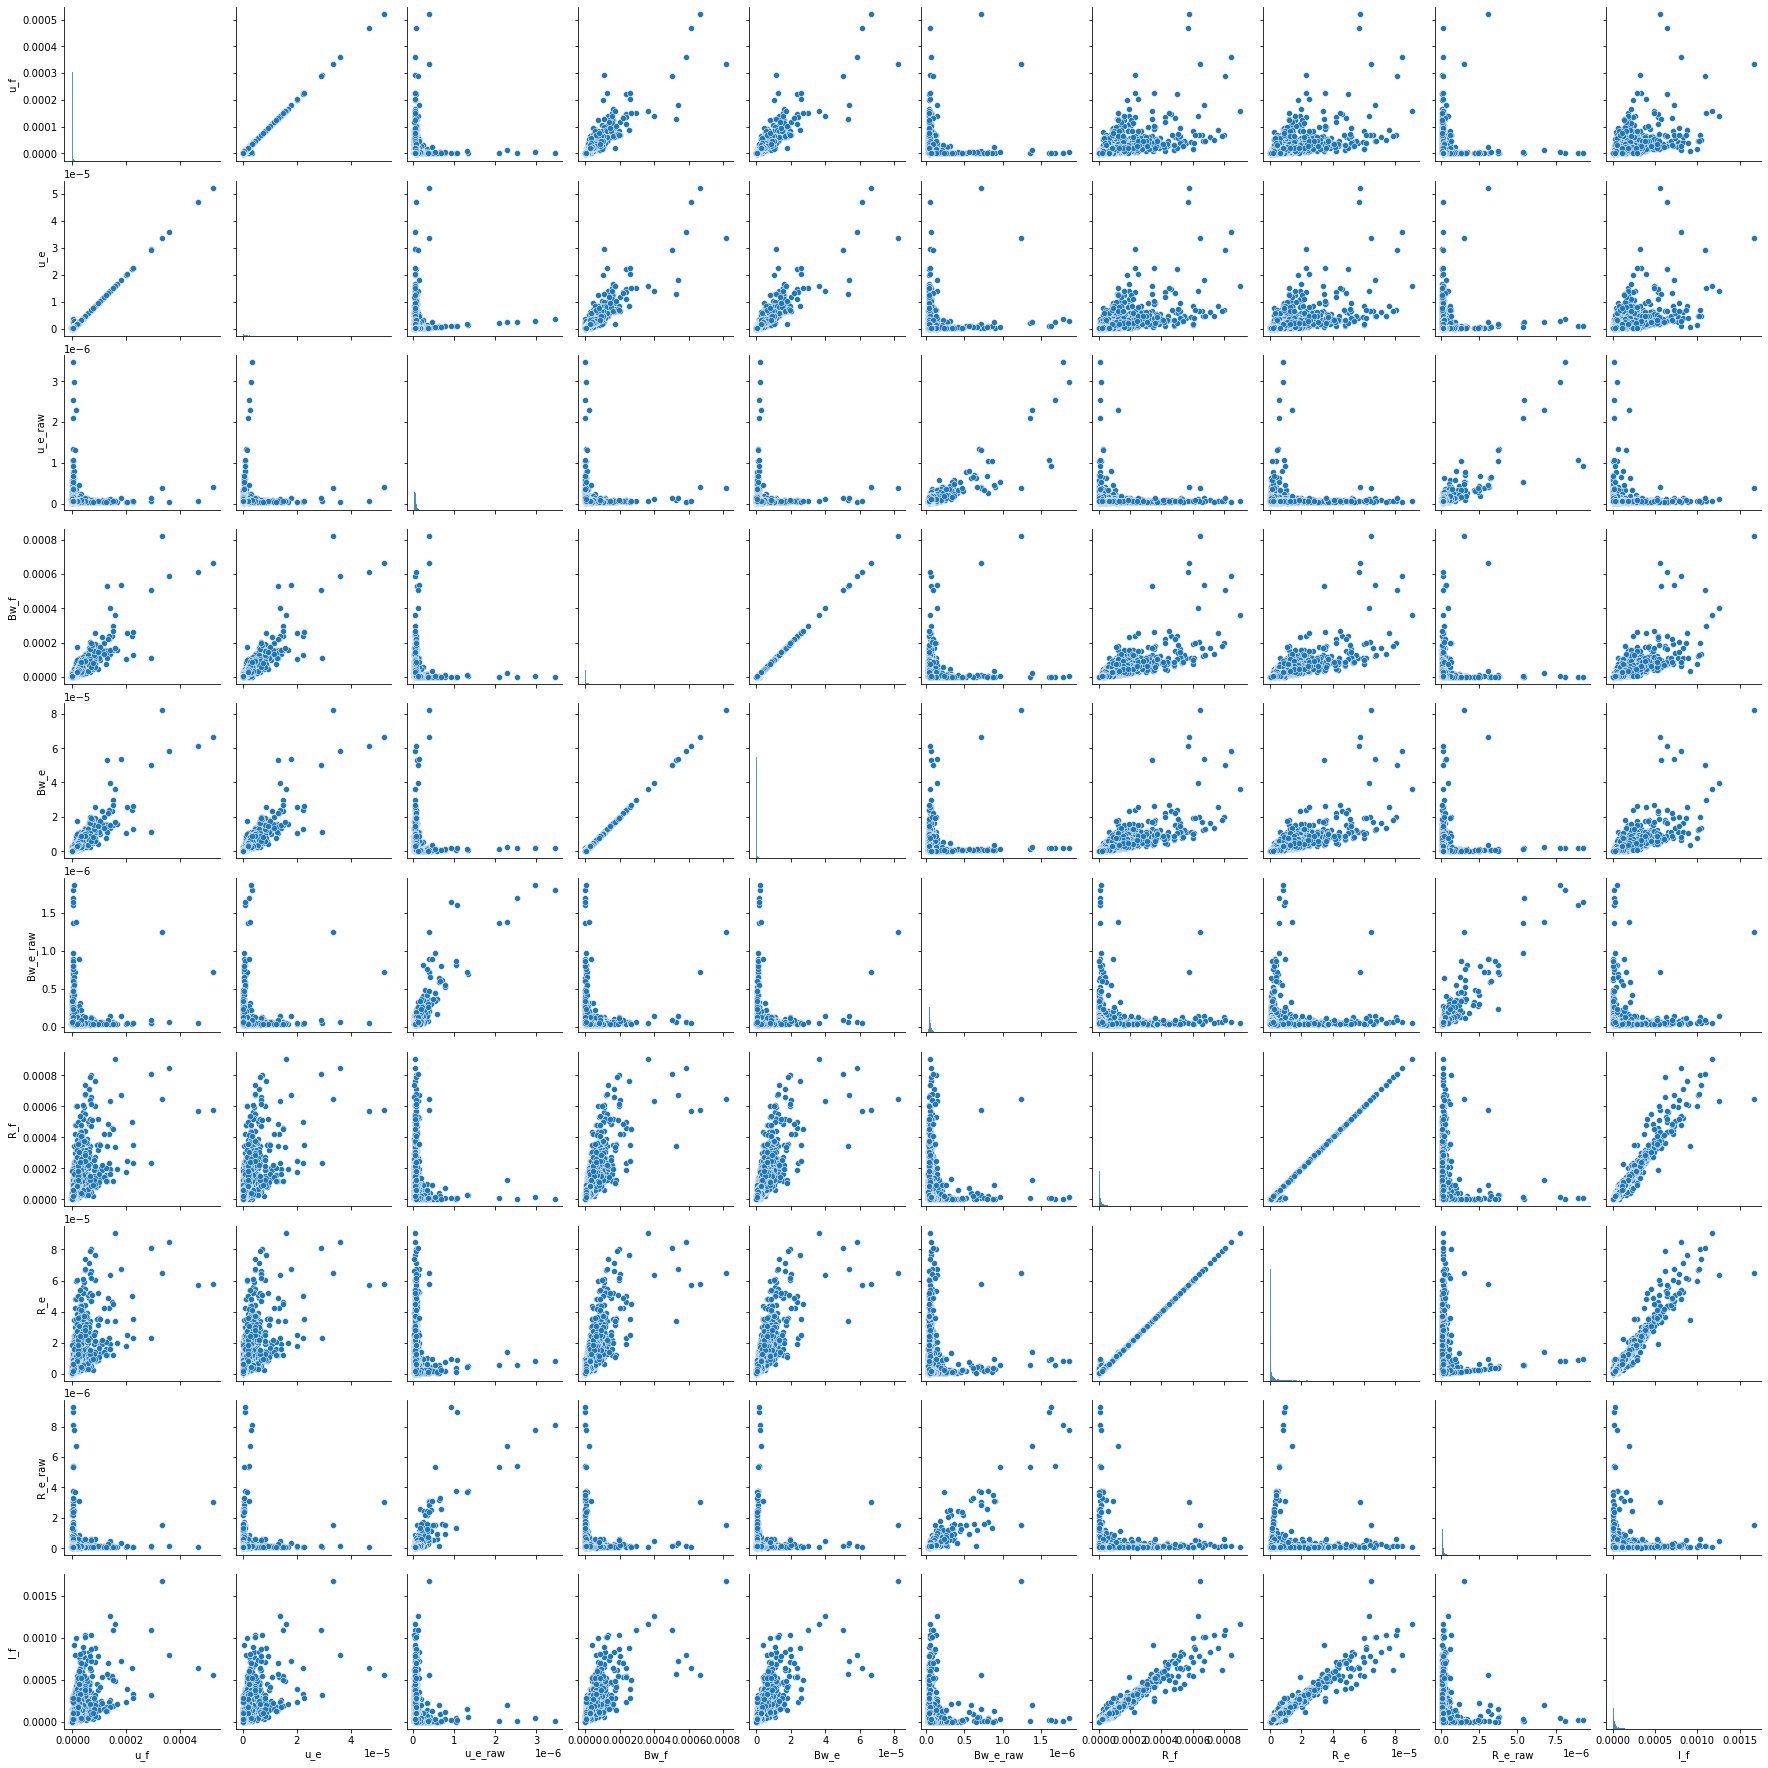

In [32]:
sns.pairplot(data[0].iloc[:, 15:25])
plt.show()
#fig = swarm_plot.get_figure()
#fig.savefig("./Output/Bootes_pairplot.pdf")

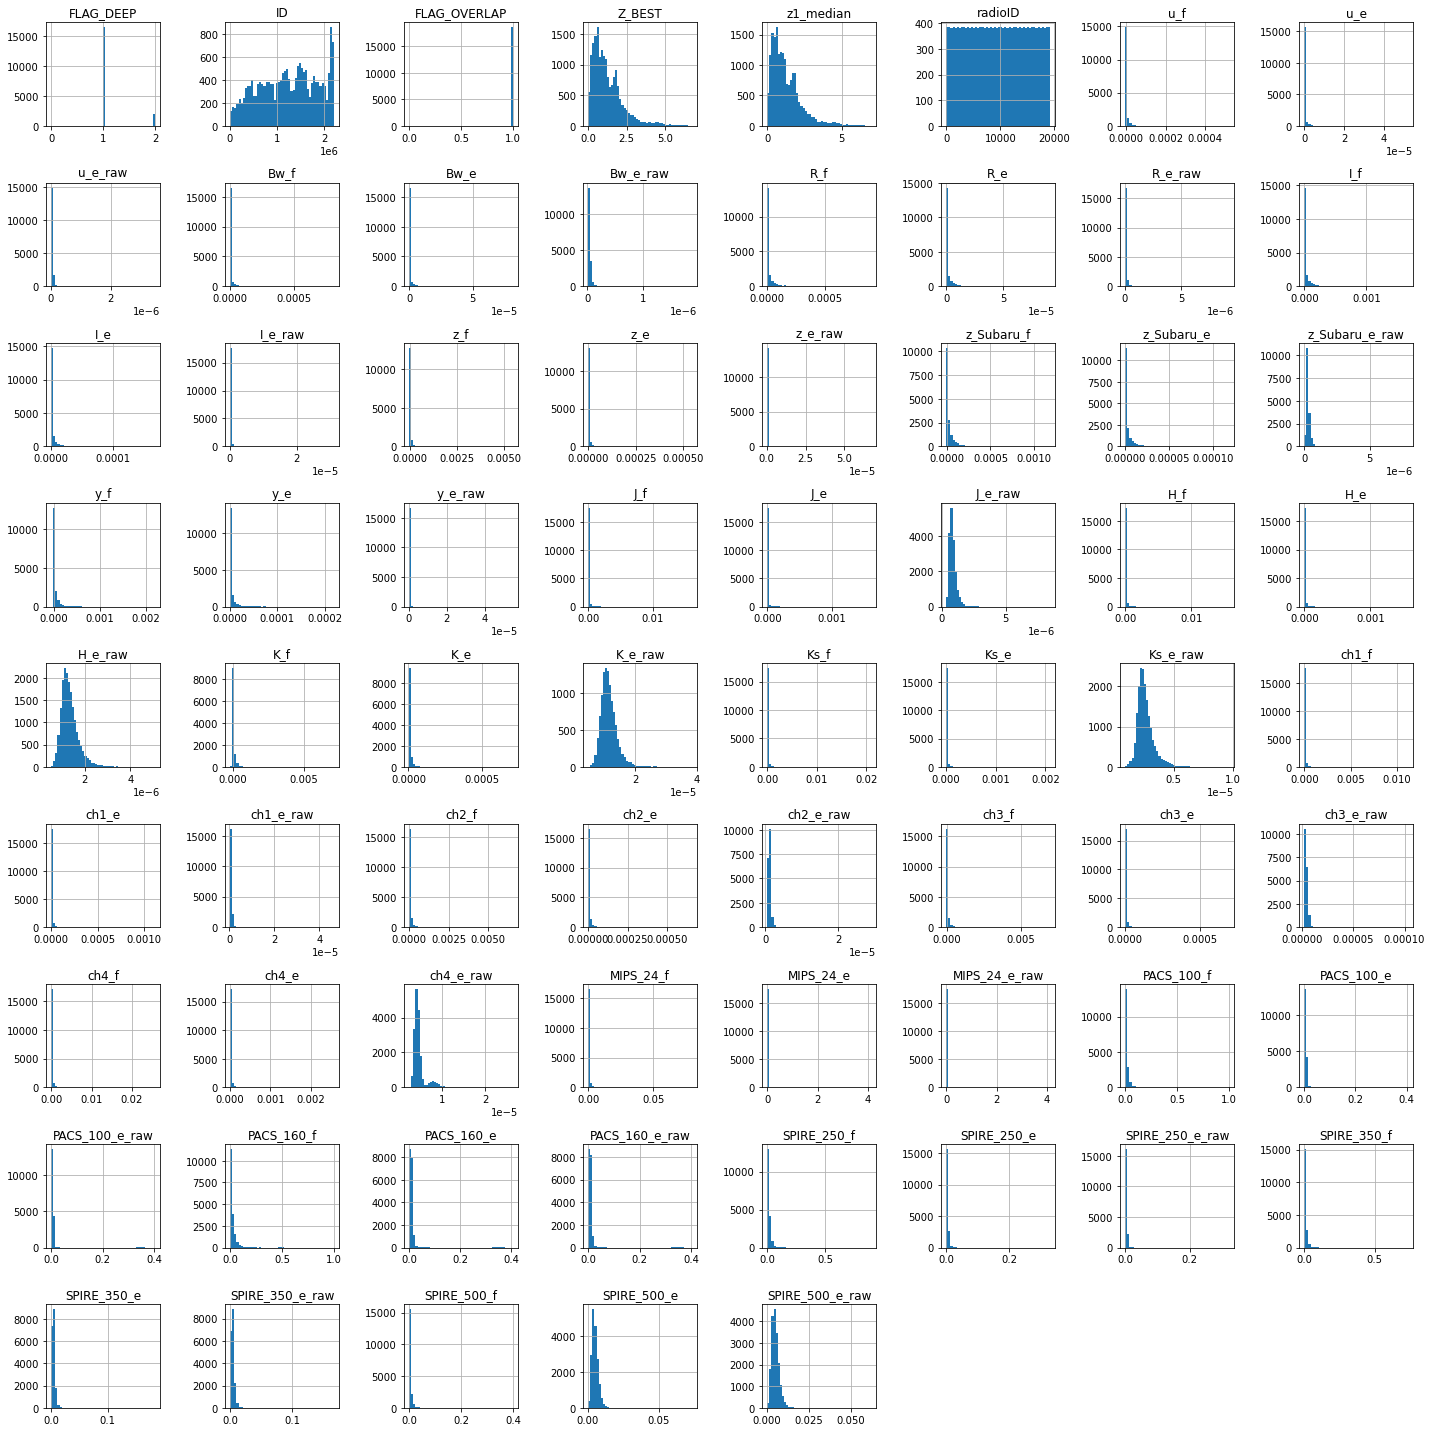

In [24]:
data[0].hist(figsize = (20,20), bins=50)
plt.tight_layout()
plt.savefig("./Output/histograms_Bootes.pdf")

In [29]:
data[0].iloc[:, 15:]

,u_f,u_e,u_e_raw,Bw_f,Bw_e,Bw_e_raw,R_f,R_e,R_e_raw,I_f,...,PACS_160_e_raw,SPIRE_250_f,SPIRE_250_e,SPIRE_250_e_raw,SPIRE_350_f,SPIRE_350_e,SPIRE_350_e_raw,SPIRE_500_f,SPIRE_500_e,SPIRE_500_e_raw
0,NaN,NaN,NaN,NaN,NaN,NaN,8.513552e-06,8.678899e-07,1.686035e-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.344011e-06,2.047629e-07,1.544803e-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,2.032303e-07,1.671618e-07,1.659218e-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.247820e-05,1.255706e-06,1.405082e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.809573e-06,2.021202e-07,9.003895e-08,NaN,NaN,NaN,6.665676e-06,7.209728e-07,2.747533e-07,1.818185e-05,...,0.008919,0.005010,0.003922,0.003890,0.002179,0.002661,0.002652,0.000991,0.001511,0.001508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,NaN,NaN,NaN,NaN,NaN,NaN,6.154450e-07,2.403500e-07,2.323368e-07,7.654842e-07,...,0.031743,0.063601,0.007054,0.003050,0.072174,0.008499,0.004487,0.048765,0.017045,0.016333
19175,4.593947e-08,6.908074e-08,6.892782e-08,NaN,NaN,NaN,1.663337e-06,2.031222e-07,1.165835e-07,3.105366e-06,...,0.021820,0.011170,0.008243,0.008167,0.011499,0.007815,0.007730,0.013932,0.009484,0.009381
19176,1.541511e-06,1.651813e-07,5.934882e-08,NaN,NaN,NaN,1.840104e-05,1.843669e-06,1.145848e-07,3.066861e-05,...,0.055850,0.010545,0.007480,0.007406,0.004114,0.003778,0.003755,0.003503,0.004351,0.004337
19177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.346872,0.020603,0.003603,0.002955,0.024862,0.004512,0.003765,0.013760,0.006734,0.006592
